In [3]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np
import sklearn.metrics as metrics

In [17]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()
## 데이터를 (배치사이즈 x 28 x 28 x 1)로 이미지를 변환해줌. -> 그레이스케일이므로 채널은 1
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

## 정답을 바이너리화 함.
Y_train =tf.keras.utils.to_categorical(Y_train) # 정수 ----> one-hot
Y_test = tf.keras.utils.to_categorical(Y_test) # 정수 ----> one-hot

In [35]:
# CNN 모델 설계.
## 모델
input_Layer = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(input_Layer)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), strides = 1, activation='relu')(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
Out_Layer=tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()

loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
#metrics = tf.keras.metrics.categorical_accuracy
model.compile(loss=loss,
              optimizer = optimizer,
              metrics= ['accuracy'])

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 2304)              0   

In [36]:
import math

def step_decay(epoch):
    initial_rate = 0.001
    drop = 0.98
    epochs_drop = 50.0
    lrate = initial_rate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [37]:
# 모델 최적화 설정
MODEL_DIR = './CNN_MNIST_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./CNN_MNIST_model/{epoch:02d}-{val_loss:.4f}.hdf5"

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),
    tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1, save_best_only=True),
    tf.keras.callbacks.LearningRateScheduler(step_decay, verbose=1)
]

In [38]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=200, verbose=1, callbacks = callbacks_list)

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50
230/240 [===========================>..] - ETA: 0s - loss: 1.6524 - accuracy: 0.7617
Epoch 1: val_loss improved from inf to 0.47468, saving model to ./CNN_MNIST_model/01-0.4747.hdf5
240/240 [==============================] - 2s 6ms/step - loss: 1.6033 - accuracy: 0.7648 - val_loss: 0.4747 - val_accuracy: 0.8388 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/50
 34/240 [===>..........................] - ETA: 0s - loss: 0.4424 - accuracy: 0.8484

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


233/240 [============================>.] - ETA: 0s - loss: 0.4091 - accuracy: 0.8594
Epoch 2: val_loss improved from 0.47468 to 0.41661, saving model to ./CNN_MNIST_model/02-0.4166.hdf5
240/240 [==============================] - 1s 5ms/step - loss: 0.4095 - accuracy: 0.8593 - val_loss: 0.4166 - val_accuracy: 0.8600 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/50
232/240 [============================>.] - ETA: 0s - loss: 0.3349 - accuracy: 0.8849
Epoch 3: val_loss improved from 0.41661 to 0.37914, saving model to ./CNN_MNIST_model/03-0.3791.hdf5
240/240 [==============================] - 1s 5ms/step - loss: 0.3353 - accuracy: 0.8849 - val_loss: 0.3791 - val_accuracy: 0.8691 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/50
236/240 [============================>.] - ETA: 0s - loss: 0.2998 - accuracy: 0.8938
Epoch 4: val_loss improved from 0.37914 to 0.34733, saving model to ./CNN_MNIST_model/04-0.3473.hdf5
240/

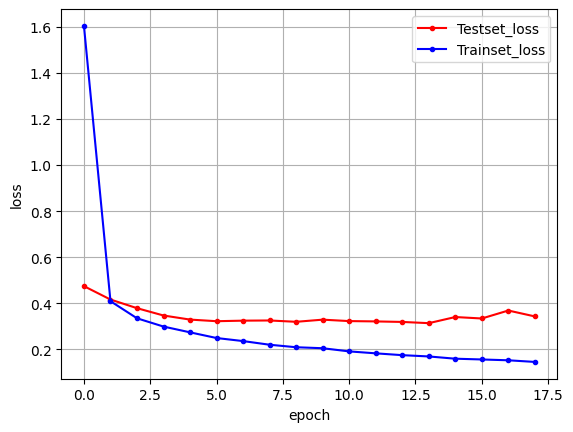

In [39]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
